<a href="https://colab.research.google.com/github/SterlingHayden/Gradient-Descent-Methods/blob/main/MiniBatchStochasticGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 15: Stochastic Gradient Descent, Mini-Batch Stochastic Gradient Descent, and Online Learning

---

## Objectives

Students will be skilled at

1. implementing stochastic gradient descent and mini-batch stochastic gradient descent algorithms


## Importing numpy and matplotlib

We will use numpy to assist in implementing numerical subroutines.  We will also use matplotlib to visualize the algorithms.

In [ ]:
import numpy as np
import matplotlib.pyplot as pt

## Example: Least Squares Regression

Below, we illustrate the ideas of this lesson as applied to least squares regression.  These ideas can be applied to other statistical learning models by replacing the objective function and gradient accordingly.

### Statement of Optimization Model

The least-squares regression model is obtained by solving

$\min_{b,\beta} \| X \beta - y \|_2^2$,

which is equivalent to

$\min_{b,\beta} f(b,\beta) = \frac{1}{m}\| X \beta - y \|_2^2$

where
* $\beta = [\beta_0, \beta_1,\ldots,\beta_n]^T$ are the regression coefficients (here $\beta_0$ is the intercept)
* $X$ is an $m \times (n + 1)$ matrix in which the element $x_{ij}$ in row $i = 0,1,\ldots,m - 1$ and column $j = 0,1,\ldots,n$ is the value of feature $j$ in observation $i$.  (Note: Every element in row $j = 0$ will be assigned a value of $1$; thus, $\beta_0$ represents the intercept of the regression model.)
* $y = [y_0,y_1,\ldots,y_{m-1}]^T$ are the response values associated with each observation

### Evaluating the Objective Function and Gradient

We will first define functions to evaluate the objective and objective gradient.  We illustrate using a small example with $n = 2$ features and $m = 4$ observations.

In [ ]:
# Example Data
X = np.array([[1, 1.62434536, -0.61175641], [1, -0.52817175, -1.07296862],
              [1, 0.86540763, -2.3015387],[1, 1.74481176, -0.7612069]])
y = np.array([10.72203816, 6.66382161, 16.55964722, 6.65296281])

The following function evaluates the objective.

In [ ]:
# Function to evaluate the objective
# Will assume as input a numpy.ndarray solution of length n+1; elements are (beta[0],beta[1],beta[2],...,beta[n])
def f(beta, X_vals, y_vals):
  try:
    res = X_vals @ beta - y_vals
    num_obs = X_vals.shape[0]
    return (1/num_obs)*sum(res**2)
  except:
    print("Not a valid solution")

The gradient is given by $\nabla f(\beta) = [\partial f/ \partial \beta_0, \partial f/ \partial \beta_1, \ldots, \partial f/ \partial \beta_n]$, where

$$\partial f / \partial \beta_j = \frac{2}{m}\sum_{i=0}^{m-1}x_{ij}\left(\sum_{k = 0}^{n} \beta_k x_{ij} - y_i\right), \ \forall j = 0,1,\ldots,n$$.

Alternatively, we can express $\nabla f(\beta)$ as

$$\nabla f(\beta) = \frac{2}{m} X^T(X\beta - y) $$

The following function evaluates the objective gradient.

In [ ]:
# Function to evaluate the gradient
def f_gradient(beta, X_vals, y_vals):
  try:
    res =  X_vals @ beta - y_vals
    num_obs = X_vals.shape[0]
    return (2/num_obs) * X_vals.T @ res
  except:
    print("Not a valid solution")

The following code tests the objective and gradient functions

In [ ]:
# Test the objective and gradient functions
beta_sol = np.array([5, 3, -2])
print(f(beta_sol, X, y))
print(f_gradient(beta_sol, X, y))

11.604455905901606
[0.00782523 3.1612172  3.55206231]


### Fit a Small Dataset Using Gradient Descent

We begin by fitting the regression model using gradient descent.  Although this is not the preferred method for fitting a basic least-squares regression model, I have chosen this example because it provides a simple illustration that can also be extended to other kinds of models.

We demonstrate initially using a slightly larger random data set with 2 features and 25 observations.  

In [ ]:
# Generate a random data set with 2 features and 25 observations
# Each obs. of each feature is generated from a standard normal distribution
m = 25
n = 2
np.random.seed(1)
ones_array = np.ones((m,1))
features_array = np.random.normal(0,1,(m,n))
X = np.hstack((ones_array,features_array))

We randomly generate the response values as $y_i = 5 + 2x_{i1} -3x_{i2} + \epsilon_i$, where $\epsilon_i$ is normally distributed with mean $0$ and standard deviation $2$

In [ ]:
# Generate response values according to the theoretical model y_i = 5 + 2x[i,1] -3x[i,2]
theoretical_coefs = np.array([5, 2,-3])
y = X @ theoretical_coefs + np.random.normal(0,2,m)

The resulting data is displayed below.

In [ ]:
print("X:")
print(X)
print("y:")
print(y)

X:
[[ 1.          1.62434536 -0.61175641]
 [ 1.         -0.52817175 -1.07296862]
 [ 1.          0.86540763 -2.3015387 ]
 [ 1.          1.74481176 -0.7612069 ]
 [ 1.          0.3190391  -0.24937038]
 [ 1.          1.46210794 -2.06014071]
 [ 1.         -0.3224172  -0.38405435]
 [ 1.          1.13376944 -1.09989127]
 [ 1.         -0.17242821 -0.87785842]
 [ 1.          0.04221375  0.58281521]
 [ 1.         -1.10061918  1.14472371]
 [ 1.          0.90159072  0.50249434]
 [ 1.          0.90085595 -0.68372786]
 [ 1.         -0.12289023 -0.93576943]
 [ 1.         -0.26788808  0.53035547]
 [ 1.         -0.69166075 -0.39675353]
 [ 1.         -0.6871727  -0.84520564]
 [ 1.         -0.67124613 -0.0126646 ]
 [ 1.         -1.11731035  0.2344157 ]
 [ 1.          1.65980218  0.74204416]
 [ 1.         -0.19183555 -0.88762896]
 [ 1.         -0.74715829  1.6924546 ]
 [ 1.          0.05080775 -0.63699565]
 [ 1.          0.19091548  2.10025514]
 [ 1.          0.12015895  0.61720311]]
y:
[10.68430061  6.45

#### Implement a Single Gradient Descent Step

In the gradient descent method, we perform the update

$\mathbf{x}^{(k+1)} \leftarrow \mathbf{x}^{(k)} + t^{(k)}\mathbf{d}^{(k)}$

where $\mathbf{x}^{(k)}$ is the solution in iteration $k$, $t^{(k)}$ is the step size in iteration $k$, and $d = -\nabla f(\mathbf{x}^{(k)})$ is the search direction in iteration $k$.

In [ ]:
# Function that computes the next solution given the current solution and the step size
def gd_update(current_beta, X_vals, y_vals, step_size):
  return current_beta - step_size*f_gradient(current_beta, X_vals, y_vals)

In [ ]:
# Test the function using the initial sol [beta_0, beta_1, beta_2] = [0,0,0]
# We would expect the value of beta_0 and beta_1 to increase; beta_2 to decrease
beta_sol = np.array([0,0,0])
print(gd_update(beta_sol, X, y, .01))

[ 0.12983332  0.06359097 -0.09931205]


#### Implement Gradient Descent with a Fixed Step Size

In [ ]:
# Write a function that runs the gradient descent method with fixed step size
# Use the following inputs
#   initial_beta = an n x 1 numpy.ndarray that contains the starting solution
#   X_vals = an m x (n+1) numpy.ndarray that contains the feature values
#   y_vals = an m x 1 numpy.ndarray that contains the responses
#   step_size = a scalar that indicates the step size t for each step
#   max_iter = a maximum number of iterations
def gradient_descent(initial_beta, X_vals, y_vals, step_size, max_iter):
  sol = initial_beta
  sol_history = [sol] # will track the solutions we visit; comment this out unless you're creating a plot
  obj_history = [f(sol, X_vals, y_vals)] # will track the objective values of the solutions we visit; comment this out unless creating a plot
  num_iter = 0
  while num_iter < max_iter:
    sol = gd_update(sol, X_vals, y_vals, step_size)
    sol_history.append(sol)
    obj_history.append(f(sol, X_vals, y_vals))
    num_iter += 1

  return sol, num_iter, sol_history, obj_history

In [ ]:
# Execute the gradient descent method with step size 0.1
initial_sol = np.array([0,0,0])
(sol, num_iter, sol_history, obj_history) = gradient_descent(initial_sol, X, y, .01, 100)

In [ ]:
# Print the results
# The coefficients should be close to the theoretical values [5, 2, -3]
print(sol)
print(num_iter)
print(sol_history)
print(obj_history)

[ 4.9084904   1.76162268 -2.86074249]
100
[array([0, 0, 0]), array([ 0.12983332,  0.06359097, -0.09931205]), array([ 0.25639585,  0.12510135, -0.19542534]), array([ 0.37977482,  0.18459545, -0.28843899]), array([ 0.50005507,  0.24213564, -0.3784491 ]), array([ 0.61731905,  0.2977824 , -0.46554884]), array([ 0.73164697,  0.35159441, -0.54982857]), array([ 0.84311677,  0.40362854, -0.63137591]), array([ 0.95180428,  0.45393998, -0.7102758 ]), array([ 1.0577832 ,  0.50258222, -0.78661061]), array([ 1.16112522,  0.54960715, -0.86046022]), array([ 1.26190003,  0.59506509, -0.93190205]), array([ 1.3601754 ,  0.63900483, -1.00101119]), array([ 1.45601726,  0.68147368, -1.06786043]), array([ 1.54948968,  0.72251752, -1.13252036]), array([ 1.64065501,  0.76218086, -1.19505941]), array([ 1.72957386,  0.80050682, -1.25554391]), array([ 1.81630519,  0.83753726, -1.31403819]), array([ 1.90090632,  0.87331273, -1.37060461]), array([ 1.98343302,  0.90787256, -1.42530363]), array([ 2.06393952,  0.9412

Text(0.5, 1.0, 'Objective Value vs. Iteration')

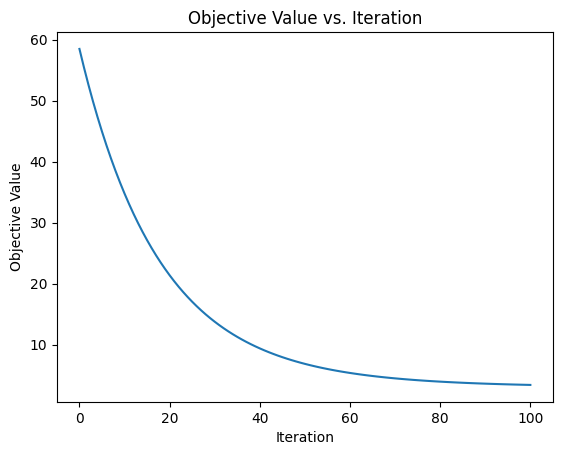

In [ ]:
# Check the algorithm's convergence
pt.plot(obj_history)
pt.xlabel('Iteration')
pt.ylabel('Objective Value')
pt.title('Objective Value vs. Iteration')

### Fit a Larger Dataset Using Gradient Descent

Here, we repeat the previous experiment using a larger dataset with 2 features 100,000 observations.  We generate the data using the same process and the same theoretical model, i.e., $y = 5 + 2x_{1} -3x_{2}$.

In [ ]:
# Generate a random data set with 2 features and 100,000 observations
# Each obs. of each feature is generated from a standard normal distribution
m = 100000
n = 2
np.random.seed(1)
ones_array = np.ones((m,1))
features_array = np.random.normal(0,1,(m,n))
X = np.hstack((ones_array,features_array))

# Generate response values according to the theoretical model y_i = 5 + 2x[i,1] -3x[i,2]
theoretical_coefs = np.array([5, 2,-3])
y = X @ theoretical_coefs + np.random.normal(0,2,m)

Here, we implement the same gradient descent algorithm as used in the smaller example.

In [ ]:
# Execute the gradient descent method with step size 0.1
initial_sol = np.array([0,0,0])
sol, num_iter, sol_history, obj_history = gradient_descent(initial_sol, X, y, 0.1, 100)

Notice that there was a noticeable solution time this time around!

In [ ]:
# The coefficients should be close to the theoretical values [5, 2, -3]
print(sol)

[ 4.99591385  1.99954141 -2.98978396]


Text(0.5, 1.0, 'Objective Value vs. Iteration')

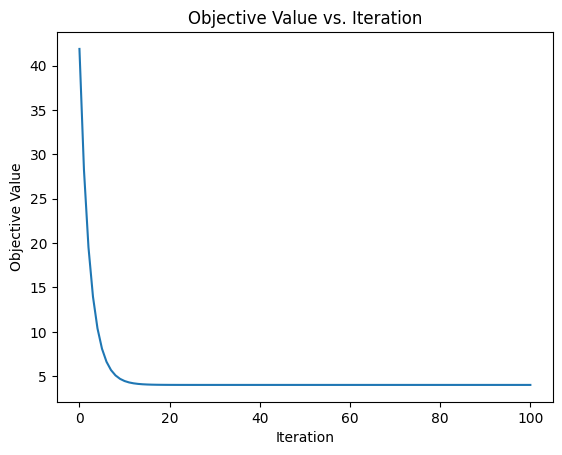

In [ ]:
# Check the algorithm's convergence
pt.plot(obj_history)
pt.xlabel('Iteration')
pt.ylabel('Objective Value')
pt.title('Objective Value vs. Iteration')

## Solve Example Using Stochastic Gradient Descent

In the previous example, we observed that the solution time for the gradient descent method grows as a function of the number of observations/rows in the dataset.  For very large datasets, the run-time and memory required to evaluate the gradient can become a substantial problem, thus motivating alternative optimization methods.  In what follows, we introduce **stochastic gradient descent** and **minibatch gradient descent** methods that address the computational limitations of the gradient descent method by estimating the gradient using only a sample of the data.

* Gradient descent is referred to as **batch learning** because it operates on all of the data at once
* Stochastic gradient descent and minibatch gradient descent are referred to as **online learning** it considers only a portion of the data, enabling model parameters to be updated as data is made available

#### Minibatch Stochastic Gradient Descent

##### Approximating the Gradient

Instead of computing $\nabla f(\beta)$ exactly using
$$\partial f / \partial \beta_j = \frac{2}{m}\sum_{i=0}^{m-1}x_{ij}\left(\sum_{k = 0}^{n} \beta_k x_{ij} - y_i\right), \ \forall j = 0,1,\ldots,n,$$
we approximate $\nabla f(\beta)$ using a subset of the data referred to as a **minibatch**.

Formally, let $B \subseteq \{0,1,\ldots,m-1\}$ denote a subset of rows in the dataset.  Let $X_B$ denote the submatrix of $X$ consisting of the row indices in $B$, and let $y_B$ denote the subvector of $y$ consisting of the row indices in $B$.  We can approximate $\nabla f(\beta)$ by using $X_B$ and $y_B$ in place of $X$ and $y$ in the gradient.  In matrix form, the approximate gradient is

$$ \nabla f (\beta) \approx \frac{2}{|B|} X_B^T(X_B\beta - y_B) $$

Note that the approximate gradient can be computed using the same gradient function as above, but replacing $X$ and $y$ with $X_B$ and $y_B$.  Here, we approximate the gradient using $10$ randomly selected rows of data.

In [ ]:
# Sample 10 rows and approximate the gradient at [beta_0, beta_1, beta_2] = [0, 0, 0]
sampled_rows = np.random.randint(X.shape[0], size = 10)
print(sampled_rows)
X_B = X[sampled_rows]
y_B = y[sampled_rows]

[47686 86952 45204 89331 10803 10197 83298 96902 69328 84635]


##### Implement a Single Minibatch Gradient Descent Step

The minibatch gradient descent update is the same as our original update function "gd_update", but replacing $X$ and $y$ with $X_B$ and $y_B$.  Here, we demonstrate an update using $10$ randomly selected rows of data.

In [ ]:
# Generate a minibatch of size 10 and evaluate the update
beta_sol = np.array([0,0,0])
print(gd_update(beta_sol, X_B, y_B, .1))

[ 0.88530004  0.68796447 -0.3258041 ]


##### Implement Minibatch Gradient Descent

In [ ]:
# Function that runs minibatch stochastic gradient descent method with fixed step size
# Use the following inputs
#   initial_sol = a numpy.array that contains the starting solution
#   step_size = a scalar that indicates the step size t for each step
#   minibatch_size = an integer that indicates the number of observations sampled in each step
#   max_iter = a maximum number of iterations
#   X_vals = X data
#   y_vals = y data
def minibatch_gd(initial_beta, X_vals, y_vals, minibatch_size, step_size, max_iter):
  sol = initial_beta
  sol_history = [sol] # skip this unless we need a record of solutions visited
  obj_history = [f(sol,X_vals,y_vals)] # skip this unless we need to record loss function
  num_iter = 0
  while num_iter < max_iter:
    # Here we sample with replacement; this is not the only way
    sampled_rows = np.random.randint(X_vals.shape[0], size = minibatch_size)
    X_B = X[sampled_rows] # Extract rows at random from X
    y_B = y[sampled_rows] # Extract matching rows from y
    sol = gd_update(sol, X_B, y_B, step_size)
    sol_history.append(sol) #skip this unless we need the solutions visited
    obj_history.append(f(sol,X_vals,y_vals)) #skip this unless we need to record loss function
    num_iter += 1

  return sol, num_iter, sol_history, obj_history

When $|B| = 1$, the algorithm is referred to as **stochastic gradient descent**.

In [ ]:
# Execute the stochastic gradient descent method with step size 0.1
initial_sol = np.array([0,0,0])
(sol, num_iter, sol_history, obj_history) = minibatch_gd(initial_sol, X, y, 1, 0.1, 1000)

It is worth noting that the most time consuming step in our implementation is evaluating the function $f$.  Our only purpose in including this step was to plot the algorithm's convergence; therefore, we can actually remove this step.  We demonstrate this below.

In [ ]:
# The coefficients should be close to the theoretical value
print(sol)

[ 5.23789418  1.44818606 -4.51562444]


Text(0.5, 1.0, 'Optimal Objective Value vs. Iteration')

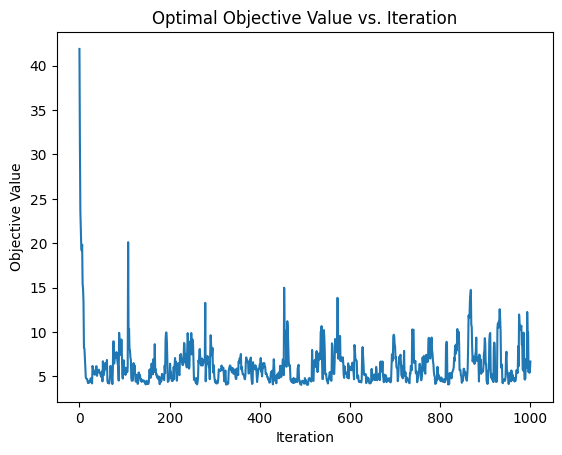

In [ ]:
# Plot the results
pt.plot(obj_history)
pt.xlabel('Iteration')
pt.ylabel('Objective Value')
pt.title('Optimal Objective Value vs. Iteration')

In [ ]:
# Remove the commmands that evaluate the objective value
# Use the following inputs
#   initial_sol = a numpy.array that contains the starting solution
#   step_size = a scalar that indicates the step size t for each step
#   minibatch_size = an integer that indicates the number of observations sampled in each step
#   max_iter = a maximum number of iterations
#   X_vals = X data
#   y_vals = y data
#   enable_output = True if we are recording solutions and objective values; False otherwise
def minibatch_gd(initial_beta, X_vals, y_vals, minibatch_size, step_size, max_iter, enable_output):
  sol = initial_beta
  sol_history = []
  obj_history = []
  if enable_output == True:
    sol_history = [sol]
    obj_history = [f(sol,X_vals,y_vals)]

  num_iter = 0
  while num_iter < max_iter:
    # Here we sample with replacement; this is not the only way
    sampled_rows = np.random.randint(X_vals.shape[0], size = minibatch_size)
    X_B = X[sampled_rows] # Extract rows at random from X
    y_B = y[sampled_rows] # Extract matching rows from y
    sol = gd_update(sol, X_B, y_B, step_size)
    if enable_output == True:
      sol_history.append(sol) #record the solutions visited
      obj_history.append(f(sol,X_vals,y_vals)) #record loss function
    num_iter += 1

  return sol, num_iter, sol_history, obj_history

In [ ]:
# Rerun the code after removing the portion that stores the objective values
# Try 1000 and 10000 iterations
initial_sol = np.array([0,0,0])
(sol, num_iter, sol_history, obj_history) = minibatch_gd(initial_sol, X, y, 1, 0.1, 1000, False)

In [ ]:
print(sol)

[ 4.79708764  2.38344541 -3.28704789]


In [ ]:
# Try reducing the step size to 0.01
initial_sol = np.array([0,0,0])
(sol, num_iter, sol_history, obj_history) = minibatch_gd(initial_sol, X, y, 1, 0.01, 1000, False)

In [ ]:
print(sol)

[ 4.65763919  2.11301801 -3.13179556]


##### Try it with Larger Minibatches

We now test the minibatch gradient descent code using a batch size of 1000.

In [ ]:
#Try it with more iterations
initial_sol = np.array([0, 0, 0])
(sol, num_iter, sol_history, obj_history) = minibatch_gd(initial_sol, X, y, 1000, 0.1, 100, False)

In [ ]:
print(sol)

[ 5.01239379  1.99994896 -2.94391091]


The algorithm is quick and provides parameter estimates that are close to the theoretical values!

Try it again, this time recording the loss function at each step.

In [ ]:
#Rerun, but record the loss function at each step
initial_sol = np.array([0, 0, 0])
(sol, num_iter, sol_history, obj_history) = minibatch_gd(initial_sol, X, y, 1000, 0.1, 100, True)
print(sol)

[ 5.0150709   2.01675567 -3.00868272]


Text(0.5, 1.0, 'Objective Value vs. Iteration')

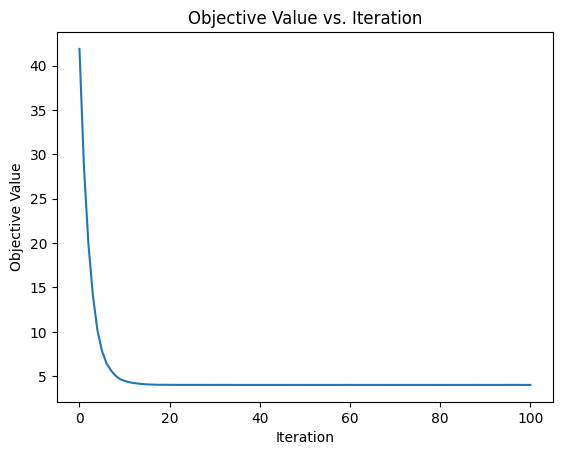

In [ ]:
# Plot the results
pt.plot(obj_history)
pt.xlabel('Iteration')
pt.ylabel('Objective Value')
pt.title('Objective Value vs. Iteration')

Note that using a minibatch size of $m$ results in gradient descent and a minibatch size of $1$ results in stochastic gradient descent.  By using a minibatch size between $1$ and $m$, the hope is to obtain a good approximation of the gradient (resulting in fewer iterations) that does not require too much computational effort to compute.